## BI case

Author: Alex de Vries.
Date: 30 - Nov 2021.

- 1) Instructions
- 2) KPI overview
- 3) Data analysis
- 4) Conclusions

## 1) Instructions
Structure the data and calculate the Samsung KPI’s 
Use your skills and ability to create a dashboard that shows the KPI performance from in weeks. 
Feel free to use all the supplied data to create extra insights next to KPI which you think is relevant to client.
Where possible use your analytics skills where you want.

Please use a visualization tool e.g. Datastudio (Google) , Tableau (One month trial) or any tool that you prefer.

## 2) KPI & calculations overview
KPI's
- PERFORMANCE (COLD) VIEWABLE CPM PER AUDIENCE SEGMENT
- (WARM) COST PER ENGAGEMENT PER AUDIENCE SEGMENT
- (HOT) COST PER ADD TO CART PER AUDIENCE SEGMENT

- AUDIENCE INSIGHTS – NOT PRIORITY
- WE ALSO WANT TO UNDERSTAND WHICH AUDIENCE SEGMENT HAS THE GREATEST REACH IN TARGET AUDIENCE

calculations
- CPM			        = Cost per 1000 impressions for. Example € 5,00 for 1000 impressions  
- CPM Calculation		= Budget / impressions * 1000 
- Viewablitiy (%)		= Impressions / viewable impressions 
- Viewable CPM (vCPM) 	= budget spend / impressions * 1000 * viewabilty %
- Cost per engaged visit	= budget spend / nr. engaged visits
- Cost per add to cart		= budget spend / nr. add to cart
- Click through rate (CTR)	= impressions / clicks

## 3) Data analysis

In [1]:
# import libraries
import seaborn as sns
import math       
import pandas as pd
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import data
# all data files were turned into xls files and then saved as Panda dataframes.
campaign_data = pd.DataFrame(pd.read_excel('campaign_data.xls'))
segment_audience_verification = pd.DataFrame(pd.read_excel('segment_audience_verification.xls'))
publisher_audience_verification = pd.DataFrame(pd.read_excel('publisher_audience_verification.xls'))
website_data = pd.DataFrame(pd.read_excel('website_data.xls'))
campaign_data.head()

,Primairy Key,Feed 1 - Unique ID,Impressions,Clicks,Click Rate,DBM Cost (Account Currency),Active View: Viewable Impressions,View-through Conversions,Click-through Conversions,Week
0,nl-paid-display-gdn-qled-scampi-starcom19q1-ba...,257,10,0,0.00,0.03,10,2,0,Week 28
1,nl-paid-display-gdn-qled-scampi-starcom19q1-ba...,305,3362,4,0.12,6.74,2551,6,9,Week 28
2,nl-paid-display-gdn-qled-scampi-starcom19q1-ba...,145,984,0,0.00,1.60,809,3,0,Week 28
3,nl-paid-display-gdn-qled-scampi-starcom19q1-ba...,177,28,0,0.00,0.06,23,0,0,Week 28
4,nl-paid-display-gdn-qled-scampi-starcom19q1-ba...,185,164,0,0.00,0.33,119,0,0,Week 28


In [3]:
# for each data set I check if there is missing data (only website shown as example). There is no missing data.
website_data.apply(lambda x: sum(x.isnull()))

PRIMARY KEY                 0
Click Throughs              0
Visits                      0
new visits                  0
Return visits               0
Entries                     0
Bounces                     0
Start conversion (visit)    0
WTB open (visit)            0
Add to cart (visit)         0
Engaged user                0
Week                        0
dtype: int64

### 3.1) Publisher audience verification analysis

In [4]:
pub_df = publisher_audience_verification.copy()
pub_df['Male_total'] = pub_df['Impressions']*pub_df['Male']
pub_df['Female_total'] = pub_df['Impressions']*pub_df['Female']

In [5]:
# functie die per publisher het aantal impressies toont (gesplits op geslacht).
def PLOT_impressies_per_publisher():
    plt.style.use('tableau-colorblind10')
    fig, ax = plt.subplots(figsize =(16, 8))
    ax.barh(pub_df.Publishers, pub_df.Male_total, label='Male')
    ax.barh(pub_df.Publishers, pub_df.Female_total, left=pub_df.Male_total,label='Female')
    ax.invert_yaxis()
    for i, total in enumerate(pub_df.Impressions):
            plt.text(total +0.3, i+0.1,str(round((total), 2)),fontsize = 12, fontweight ='bold', color ='grey')
    ax.set_title('Aantal impressies per publisher',loc ='center', )
    plt.xlabel("Aantal impressies")
    ax.legend()

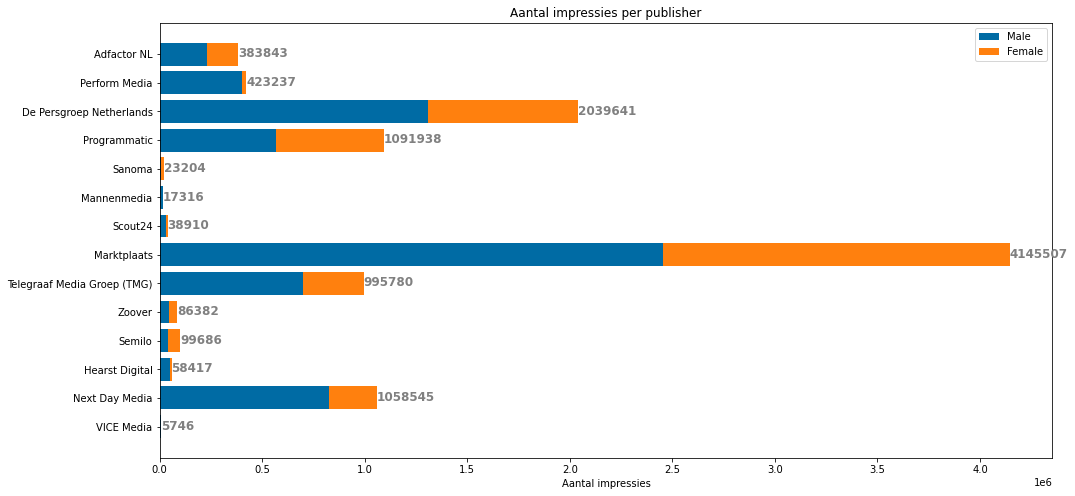

In [6]:
PLOT_impressies_per_publisher()

In [7]:
# functie die per publisher het percentage impressies per leeftijdsgroep laat zien
def PLOT_leeftijdsgroep_per_publisher():
    plt.style.use('tableau-colorblind10')
    fig, ax = plt.subplots(figsize =(16, 8))
    ax.barh(pub_df.Publishers, pub_df['18-25 years old'] + pub_df['26-30 years old'], label='18-30 years old')
    ax.barh(pub_df.Publishers, pub_df['31-35 years old'] + pub_df['36-40 years old'], left=pub_df['18-25 years old'] + pub_df['26-30 years old'],label='31-40 years old')
    ax.barh(pub_df.Publishers, pub_df['41-45 years old'] + pub_df['46-50 years old'], left=pub_df['18-25 years old'] + pub_df['26-30 years old'] + pub_df['31-35 years old'] + pub_df['36-40 years old'],label='41-50 years old')
    ax.barh(pub_df.Publishers, pub_df['51-55 years old'] + pub_df['56-60 years old'], left=pub_df['18-25 years old'] + pub_df['26-30 years old'] + pub_df['31-35 years old'] + pub_df['36-40 years old'] + pub_df['41-45 years old'] + pub_df['46-50 years old'],label='51-60 years old')
    ax.barh(pub_df.Publishers, pub_df['61-65 years old'], left=pub_df['18-25 years old'] + pub_df['26-30 years old'] + pub_df['31-35 years old'] + pub_df['36-40 years old'] + pub_df['41-45 years old'] + pub_df['46-50 years old'] + pub_df['51-55 years old'] + pub_df['56-60 years old'],label='60-65 years old')
    ax.invert_yaxis()
    ax.set_title('Per publisher het percentage impressions per leeftijdsgroep',loc ='center', )
    plt.xlabel("percentage impressies (totaal = 100%)")
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

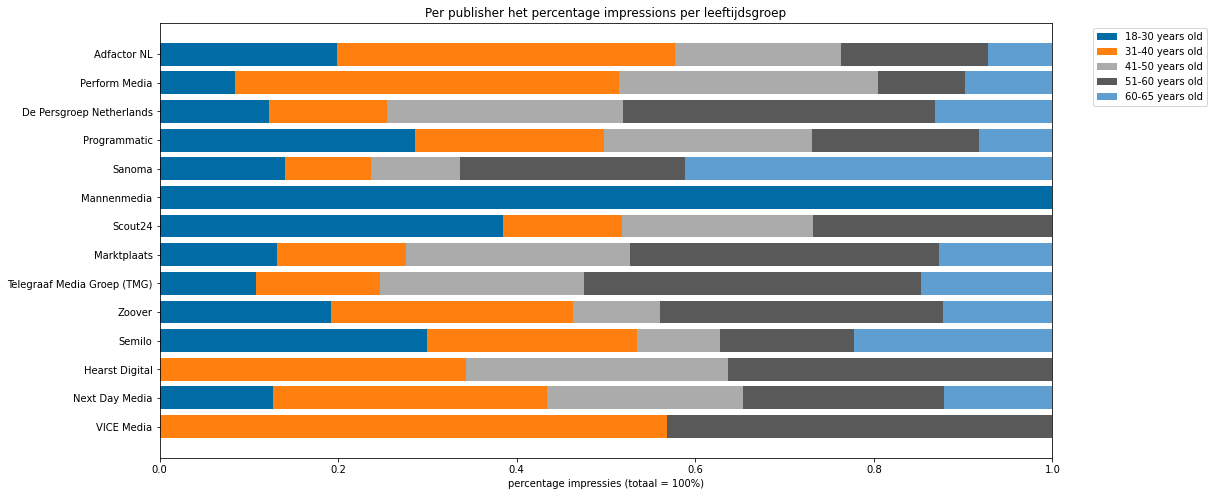

In [8]:
PLOT_leeftijdsgroep_per_publisher()

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 3.2) Viewable CPM per audience segment (cold)

In [10]:
# step 1: Split Primairy Key column into seperate columns 
camp_df = campaign_data.copy()
camp_df['Primairy Key'] = camp_df['Primairy Key'].str.replace('nl-paid-display-gdn-qled-scampi-starcom19q1-banner-qled500cb-','')
camp_df.rename(columns = {'Week ':'week'}, inplace = True)
camp_df['adsize'] = camp_df['Primairy Key'].str.split('-', expand=True)[0]
camp_df['campaign_phase'] = camp_df['Primairy Key'].str.split('-', expand=True)[1]
camp_df['data_source'] = camp_df['Primairy Key'].str.split('-', expand=True)[2]
camp_df['ga_aam'] = camp_df['Primairy Key'].str.split('-', expand=True)[3]
camp_df['segment_name'] = camp_df['Primairy Key'].str.split('-', expand=True)[4]
camp_df['Target'] = camp_df[['data_source', 'ga_aam', 'segment_name']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [11]:
# step 2: calculate vCPM
# viewability % = viewable impressions / impressions total * 100
# vCPM = budget spent / impressions * 1000 * viewability % 
camp_df['view_percentage'] = (camp_df['Active View: Viewable Impressions']/camp_df['Impressions'])*100
camp_df['vCPM'] = camp_df['DBM Cost (Account Currency)'] / camp_df['Impressions'] * 1000 * camp_df['view_percentage']

In [12]:
camp_df.head(2)

,Primairy Key,Feed 1 - Unique ID,Impressions,Clicks,Click Rate,DBM Cost (Account Currency),Active View: Viewable Impressions,View-through Conversions,Click-through Conversions,week,adsize,campaign_phase,data_source,ga_aam,segment_name,Target,view_percentage,vCPM
0,160x600-none-cold-aam-crosshigh,257,10,0,0.00,0.03,10,2,0,Week 28,160x600,none,cold,aam,crosshigh,cold-aam-crosshigh,100.000000,300.000000
1,160x600-none-cold-ga-baseline,305,3362,4,0.12,6.74,2551,6,9,Week 28,160x600,none,cold,ga,baseline,cold-ga-baseline,75.877454,152.116014


In [13]:
# it is now possible to combine campaign data and segment audience verification (on 'Target' column)
# I also seperate that DF into cold, warm and hot
camp_seg_df = pd.merge(camp_df, segment_audience_verification, on='Target', how='outer')
cold_camp_seg_df = camp_seg_df[camp_seg_df.data_source == 'cold']
warm_camp_seg_df = camp_seg_df[camp_seg_df.data_source == 'warm']
hot_camp_seg_df = camp_seg_df[camp_seg_df.data_source == 'hot']
camp_seg_df.head(1)

,Primairy Key,Feed 1 - Unique ID,Impressions,Clicks,Click Rate,DBM Cost (Account Currency),Active View: Viewable Impressions,View-through Conversions,Click-through Conversions,week,...,4 persons,5 persons,6 persons,7 or more persons,< 30.000 EUR,30.000 < 59.999 EUR,60.000 < 99.999 EUR,100.000 < 149.999 EUR,> 150.000 EUR,don't know / prefer not to state
0,160x600-none-cold-aam-crosshigh,257,10,0,0.0,0.03,10,2,0,Week 28,...,0.123355,0.039351,0.057042,0.0,0.426455,0.170736,0.192096,0.0,0.0,0.210712


In [14]:
def HEATMAP_vCPM_per_segment_per_week():
    store_df =cold_camp_seg_df[['Target', 'week', 'vCPM']]
    store_df['week'] = store_df['week'].str.replace('Week ','')
    store_df['week'] = store_df['week'].str.replace('week ','')
    store_df = store_df.groupby(["Target", "week"]).mean().round(1).unstack().sort_index(axis=1, ascending=True)
    store_df['mean'] = store_df.mean(axis=1)
    plt.figure(figsize=(10,10))
    heat_map = sns.heatmap(store_df, linewidth = 1 , annot = True, fmt ='.1f', cmap="BuPu")
    plt.title( "vCPM per segment voor elke week" )
    plt.xlabel("Campagne weken (28-33)")
    plt.ylabel("Segmenten")
    plt.show()
    #hot_camp_seg_df
    #print(store_df['mean'].mean())

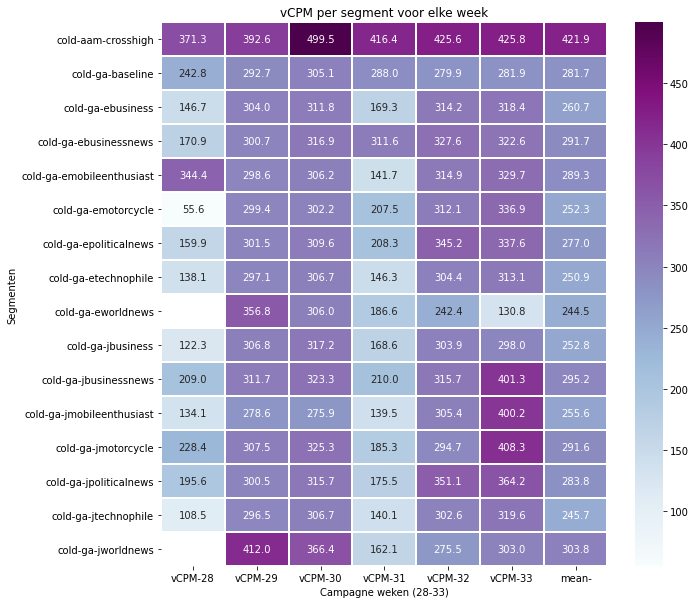

In [15]:
HEATMAP_vCPM_per_segment_per_week()

### 3.3) Cost per engagement per audience segment (warm)

In [16]:
# Cost per engaged visit = budget spend / nr. engaged visits
def HEATMAP_CPE_per_week_per_segment(INPUT):
    website_df = website_data[['PRIMARY KEY', 'Engaged user', 'Week ']]
    website_df['PRIMARY KEY'] = website_df['PRIMARY KEY'].str.replace('nl_paid_display_gdn_qled_scampi_starcom19q1_banner_qled500cb-','')
    website_df.rename(columns = {'Week ':'week'}, inplace = True)
    website_df['week'] = website_df['week'].str.replace('Week ','')
    website_df['Target'] = website_df['PRIMARY KEY'].str.split('_', expand=True)[1]
    website_df['Target'] = website_df['Target'].str.replace('none-','')
    website_df['segment'] = website_df['Target'].str.split('-', expand=True)[2]
    website_df['data_source'] = website_df['Target'].str.split('-', expand=True)[0]
    
    if (INPUT == 'all'):
        camp_web_df = pd.merge(camp_df, website_df, on='Target', how='outer')
        plt.figure(figsize=(5,10))
    else:
        camp_web_df = pd.merge(camp_df[camp_df.data_source == INPUT], 
                               website_df[website_df.data_source ==  INPUT], 
                               on='Target', how='outer')  
        plt.figure(figsize=(5,5))

    camp_web_df = camp_web_df[['segment', 'week_y', 'Engaged user' , 'DBM Cost (Account Currency)']]
    camp_web_df.rename(columns = {'week_y':'week'}, inplace = True)
    camp_web_df['CPE'] = (camp_web_df['DBM Cost (Account Currency)'] / camp_web_df['Engaged user'])
    camp_web_df['CPE'][camp_web_df['CPE'] == inf] = np.NaN
    camp_web_df = camp_web_df.drop(['Engaged user', 'DBM Cost (Account Currency)'], axis=1)
    camp_web_df = camp_web_df.groupby(["segment", "week"]).mean().round(3).unstack().sort_index(axis=1, ascending=True)
    camp_web_df['mean'] = camp_web_df.mean(axis=1)
    
    heat_map = sns.heatmap(camp_web_df, linewidth = 1 , annot = True, fmt ='.1f', cmap="Greens")
    plt.title( INPUT + ' Cost per engagement per segment voor elke week' )
    plt.xlabel("Campagne weken (28-33)")
    plt.ylabel("Segmenten")
    plt.show()

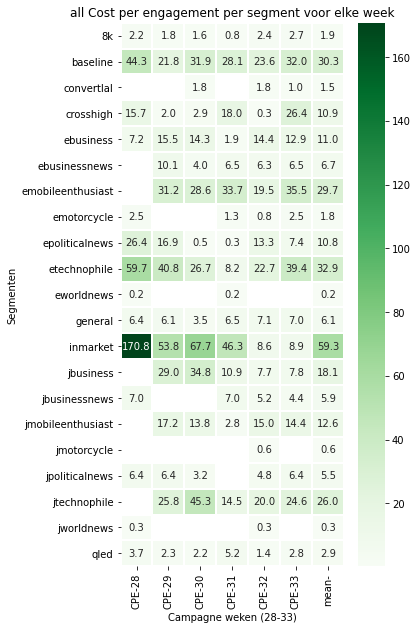

In [17]:
HEATMAP_CPE_per_week_per_segment('all')

### 3.4) Cost per Add To Cart per audience segment (hot)

In [18]:
# Cost per add to cart = budget spend / nr. add to cart
# Cost per engaged visit = budget spend / nr. engaged visits
def HEATMAP_Cost_per_addtocart(INPUT):
    website_df = website_data[['PRIMARY KEY', 'Add to cart (visit)', 'Week ']]
    website_df['PRIMARY KEY'] = website_df['PRIMARY KEY'].str.replace('nl_paid_display_gdn_qled_scampi_starcom19q1_banner_qled500cb-','')
    website_df.rename(columns = {'Week ':'week'}, inplace = True)
    website_df['week'] = website_df['week'].str.replace('Week ','')
    website_df['Target'] = website_df['PRIMARY KEY'].str.split('_', expand=True)[1]
    website_df['Target'] = website_df['Target'].str.replace('none-','')
    website_df['segment'] = website_df['Target'].str.split('-', expand=True)[2]
    website_df['data_source'] = website_df['Target'].str.split('-', expand=True)[0]
    
    if (INPUT == 'all'):
        camp_web_df = pd.merge(camp_df, website_df, on='Target', how='outer')
        plt.figure(figsize=(5,10))
    else:
        website_df = website_df[website_df.data_source ==  INPUT]
        camp_web_df = pd.merge(camp_df[camp_df.data_source == INPUT], website_df, on='Target', how='outer')  
        plt.figure(figsize=(5,5))    

    camp_web_df = camp_web_df[['segment', 'week_y', 'Add to cart (visit)' , 'DBM Cost (Account Currency)']]
    camp_web_df.rename(columns = {'week_y':'week'}, inplace = True)
    camp_web_df['Cost_ATC'] = (camp_web_df['DBM Cost (Account Currency)'] / camp_web_df['Add to cart (visit)'])
    camp_web_df['Cost_ATC'][camp_web_df['Cost_ATC'] == inf] = np.NaN
    camp_web_df = camp_web_df.drop(['Add to cart (visit)', 'DBM Cost (Account Currency)'], axis=1)
    camp_web_df = camp_web_df.groupby(["segment", "week"]).mean().round(3).unstack().sort_index(axis=1, ascending=True)
    camp_web_df['mean'] = camp_web_df.mean(axis=1)
    
    heat_map = sns.heatmap(camp_web_df, linewidth = 1 , annot = True, fmt ='.1f', cmap="Greens")
    plt.title( INPUT + ' Add to cart cost per segment voor elke week' )
    plt.xlabel("Campagne weken (28-33)")
    plt.ylabel("Segmenten")
    plt.show()        


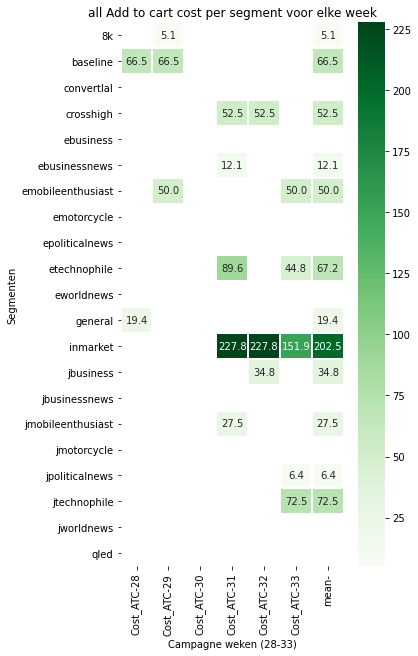

In [19]:
HEATMAP_Cost_per_addtocart('all')

## 4) Conclusions

In [7]:
# Grote verschillen tussen het aantal impressies per publisher. 
# Geslacht van bezoekers is ook niet overal gelijk verdeeld.
PLOT_impressies_per_publisher()

In [6]:
# Meeste publishers hebben een doelgroep boven 40+, sommige publishers hebben een jonger publiek.
PLOT_leeftijdsgroep_per_publisher()

In [3]:
# Crosshigh duurder dan gemiddeld
# week 28 en week 30 stuk goedkoper dan de rest
HEATMAP_vCPM_per_segment_per_week()

In [2]:
# Dit is een adaptive ontwerp. 
# Kan gebruikt worden om 'cold', 'warm', 'hot' en 'all' CPE weer te geven.
HEATMAP_CPE_per_week_per_segment('all')

In [1]:
# Dit is een adaptive ontwerp. 
# Kan gebruikt worden om 'cold', 'warm', 'hot' en 'all' cost per add to cart weer te geven.
 HEATMAP_Cost_per_addtocart('all')